# **Q1. NumPy**

In [1]:
import numpy as np

**Q1**

In [8]:
array1 = np.random.randint(0, 100, (3, 4))
array1

array([[15, 92, 94, 56],
       [40, 81, 88, 68],
       [38, 64, 68, 55]])

**Q2**

In [6]:
array1.shape

(3, 3)

**Q3**

In [7]:
print(array1.min())
print(array1.max())

18
79


**Q4**

In [13]:
array2 = array1.flatten()
array2.shape


(12,)

**Q5**

In [14]:
print(array2.min())
print(array2.max())

15
94


In [16]:
array2.mean()
array2.std()

23.043889284001807

In [18]:
array2 = np.random.randint(0, 100, (3, 4))
array3=array1 * array2
array3

array([[1140, 2944,  564, 3976],
       [2080, 1377, 6600, 2720],
       [   0,  576,  884, 4565]])

# **Q2. Pandas**

In [19]:
import pandas as pd

**Q1**

In [20]:
marks = pd.DataFrame(np.random.randint(0, 100, (5, 3)), columns=['SUBJECT1', 'SUBJECT2', 'SUBJECT3'])
marks

,SUBJECT1,SUBJECT2,SUBJECT3
0,67,12,80
1,99,31,21
2,40,83,18
3,57,79,0
4,99,50,82


**Q2-Q5**

In [21]:
print(marks.head(3))
print(marks.tail(2))
print(marks.shape)
print(marks.columns)


   SUBJECT1  SUBJECT2  SUBJECT3
0        67        12        80
1        99        31        21
2        40        83        18
   SUBJECT1  SUBJECT2  SUBJECT3
3        57        79         0
4        99        50        82
(5, 3)
Index(['SUBJECT1', 'SUBJECT2', 'SUBJECT3'], dtype='object')


**Q6**

In [23]:
marks["TOTAL"] = marks.sum(axis=1)
# marks["Total"]=marks["SUBJECT1"]+marks["SUBJECT2"]+marks["SUBJECT3"]
marks

,SUBJECT1,SUBJECT2,SUBJECT3,TOTAL
0,67,12,80,159
1,99,31,21,151
2,40,83,18,141
3,57,79,0,136
4,99,50,82,231


**Q7**

In [32]:
marks.columns
marks_sorted=marks.sort_values(by='TOTAL', ascending=False)
marks_sorted

,SUBJECT1,SUBJECT2,SUBJECT3,TOTAL
4,99,50,82,231
0,67,12,80,159
1,99,31,21,151
2,40,83,18,141
3,57,79,0,136


**Q8**

In [28]:
marks_csv=marks.to_csv('marks.csv')

**Q9**

In [29]:
load_marks=pd.read_csv('marks.csv')
load_marks

,Unnamed: 0,SUBJECT1,SUBJECT2,SUBJECT3,TOTAL
0,0,67,12,80,159
1,1,99,31,21,151
2,2,40,83,18,141
3,3,57,79,0,136
4,4,99,50,82,231


# **Q3**

**Q1**

In [41]:
exam_scores=pd.read_csv('exam_scores.csv')
exam_scores.drop(columns=['Unnamed: 0'], inplace=True)
exam_scores

,"Mathematics,Physics,Chemistry,Biology"
0,"85,90,88,78"
1,"70,75,68,72"
2,"92,85,90,88"
3,"65,72,75,68"
4,"80,78,82,85"
...,...
56,"75,68,72,78"
57,"82,85,88,90"
58,"80,78,82,85"
59,"92,85,90,88"


**Q2**

In [45]:
exam_scores[['Mathematics','Physics','Chemistry','Biology']]= exam_scores['Mathematics,Physics,Chemistry,Biology'].str.split(',',expand=True).astype(int)
exam_scores.drop(columns=['Mathematics,Physics,Chemistry,Biology'], inplace=True)
exam_scores


,Mathematics,Physics,Chemistry,Biology
0,85,90,88,78
1,70,75,68,72
2,92,85,90,88
3,65,72,75,68
4,80,78,82,85
...,...,...,...,...
56,75,68,72,78
57,82,85,88,90
58,80,78,82,85
59,92,85,90,88


**Q3**

In [46]:
exam_scores.describe()

,Mathematics,Physics,Chemistry,Biology
count,61.000000,61.000000,61.000000,61.000000
mean,79.868852,80.655738,81.360656,82.606557
std,8.226938,8.245979,7.780387,6.611300
min,65.000000,68.000000,68.000000,68.000000
25%,75.000000,72.000000,75.000000,78.000000
50%,80.000000,80.000000,82.000000,85.000000
75%,88.000000,88.000000,88.000000,88.000000
max,92.000000,92.000000,92.000000,90.000000


**Q4**

In [51]:
exam_scores['Total']=exam_scores['Mathematics']+exam_scores['Physics']+exam_scores['Chemistry']+exam_scores['Biology']
exam_scores['Percentage']=(exam_scores['Total']/400)*100
exam_scores

,Mathematics,Physics,Chemistry,Biology,Total,Percentage
0,85,90,88,78,341,85.25
1,70,75,68,72,285,71.25
2,92,85,90,88,355,88.75
3,65,72,75,68,280,70.00
4,80,78,82,85,325,81.25
...,...,...,...,...,...,...
56,75,68,72,78,293,73.25
57,82,85,88,90,345,86.25
58,80,78,82,85,325,81.25
59,92,85,90,88,355,88.75


**Q5**

In [58]:
top_student_id = exam_scores['Percentage'].idxmax()

print("Top-performing student ID: ", top_student_id)
print(exam_scores.loc[top_student_id])

Top-performing student ID:  2
Mathematics     92.00
Physics         85.00
Chemistry       90.00
Biology         88.00
Total          355.00
Percentage      88.75
Name: 2, dtype: float64


**Q6**

In [60]:
correlation_matrix = exam_scores[['Mathematics', 'Physics', 'Chemistry', 'Biology']].corr()

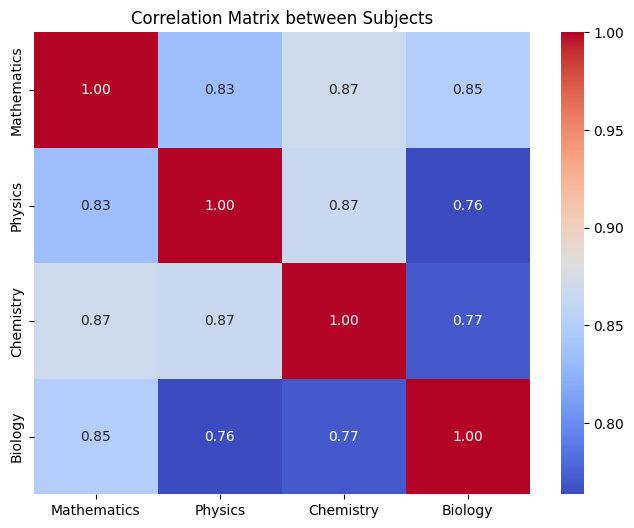

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix between Subjects")
plt.show()

**Q7**

In [65]:
passed_all = exam_scores[(exam_scores['Mathematics'] >= 40) &
                                  (exam_scores['Physics'] >= 40) &
                                  (exam_scores['Chemistry'] >= 40) &
                                  (exam_scores['Biology'] >= 40)]

pass_percentage = len(passed_all) / len(exam_scores) * 100


passed_math = exam_scores[(exam_scores['Mathematics'] >= 40) &
                                        ((exam_scores['Physics'] < 40) |
                                         (exam_scores['Chemistry'] < 40) |
                                         (exam_scores['Biology'] < 40))]


pass_math_percentage = len(passed_math) / len(exam_scores) * 100

print("Percentage of students who passed all subjects:", pass_percentage)
print("Average score of students who passed in Mathematics:", pass_math_percentage)


Percentage of students who passed all subjects: 100.0
Average score of students who passed in Mathematics: 0.0


**Q8**

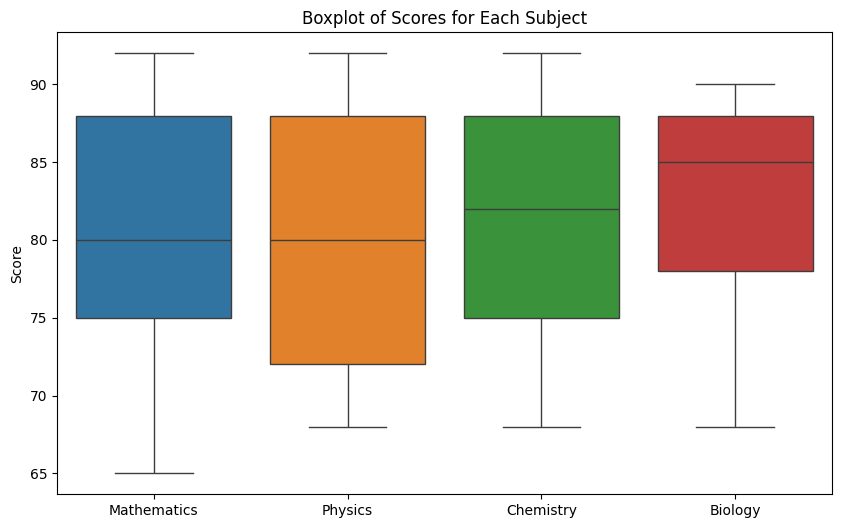

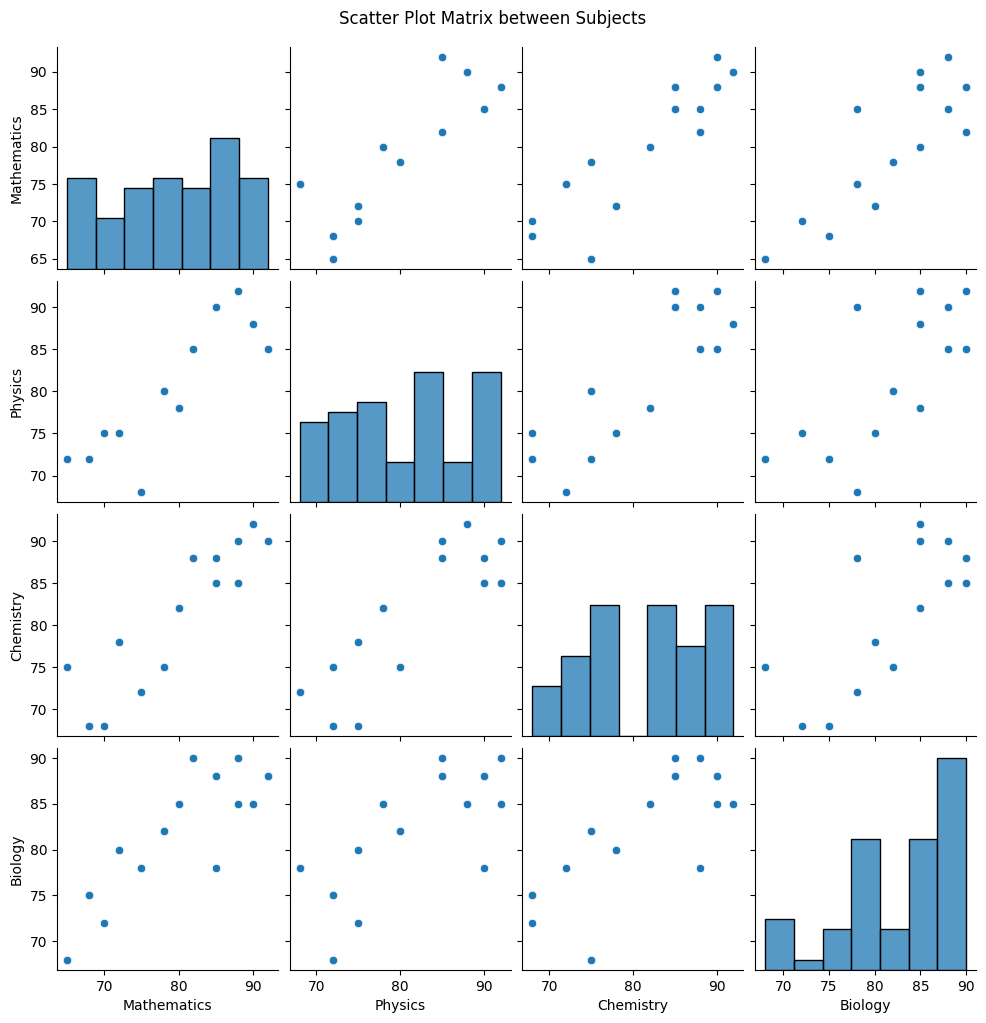

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=exam_scores[['Mathematics', 'Physics', 'Chemistry', 'Biology']])
plt.title('Boxplot of Scores for Each Subject')
plt.ylabel('Score')
plt.show()


sns.pairplot(exam_scores[['Mathematics', 'Physics', 'Chemistry', 'Biology']])
plt.suptitle("Scatter Plot Matrix between Subjects", y=1.02)
plt.show()
